# Import Libraries 

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid' , palette = 'viridis')
%matplotlib inline

# Load data

In [116]:
df = pd.read_csv('anime.csv')
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [120]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [122]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [124]:
df = df.dropna(subset=['genre'])

In [126]:
#I have droped the rows which is useful for recommendation

In [128]:
df['type'] = df['type'].fillna('Unknown')


#filled missing 'type' with placeholder 'unknown' because if we don't filled it with unknown it will fill it with NaN value and
many libraries don't handel NaN values well in categorical columns. 
if filled with 'unknown',many ML model and encoders can handel unknown as just another category.


In [132]:
df['rating'] = df['rating'].fillna(df['rating'].median())

In [134]:
# filled rating with median

In [136]:
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [138]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


Unique values in 'name':
['Kimi no Na wa.' 'Fullmetal Alchemist: Brotherhood' 'Gintama°' ...
 'Violence Gekiga David no Hoshi'
 'Violence Gekiga Shin David no Hoshi: Inma Densetsu'
 'Yasuji no Pornorama: Yacchimae!!']

Unique values in 'genre':
['Drama, Romance, School, Supernatural'
 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen'
 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen' ...
 'Hentai, Sports' 'Drama, Romance, School, Yuri' 'Hentai, Slice of Life']

Unique values in 'type':
['Movie' 'TV' 'OVA' 'Special' 'Music' 'ONA' 'Unknown']

Unique values in 'episodes':
['1' '64' '51' '24' '10' '148' '110' '13' '201' '25' '22' '75' '4' '26'
 '12' '27' '43' '74' '37' '2' '11' '99' 'Unknown' '39' '101' '47' '50'
 '62' '33' '112' '23' '3' '94' '6' '8' '14' '7' '40' '15' '203' '77' '291'
 '120' '102' '96' '38' '79' '175' '103' '70' '153' '45' '5' '21' '63' '52'
 '28' '145' '36' '69' '60' '178' '114' '35' '61' '34' '109' '20' '9' '49'
 '366' '97' '48' '78' '358' '15

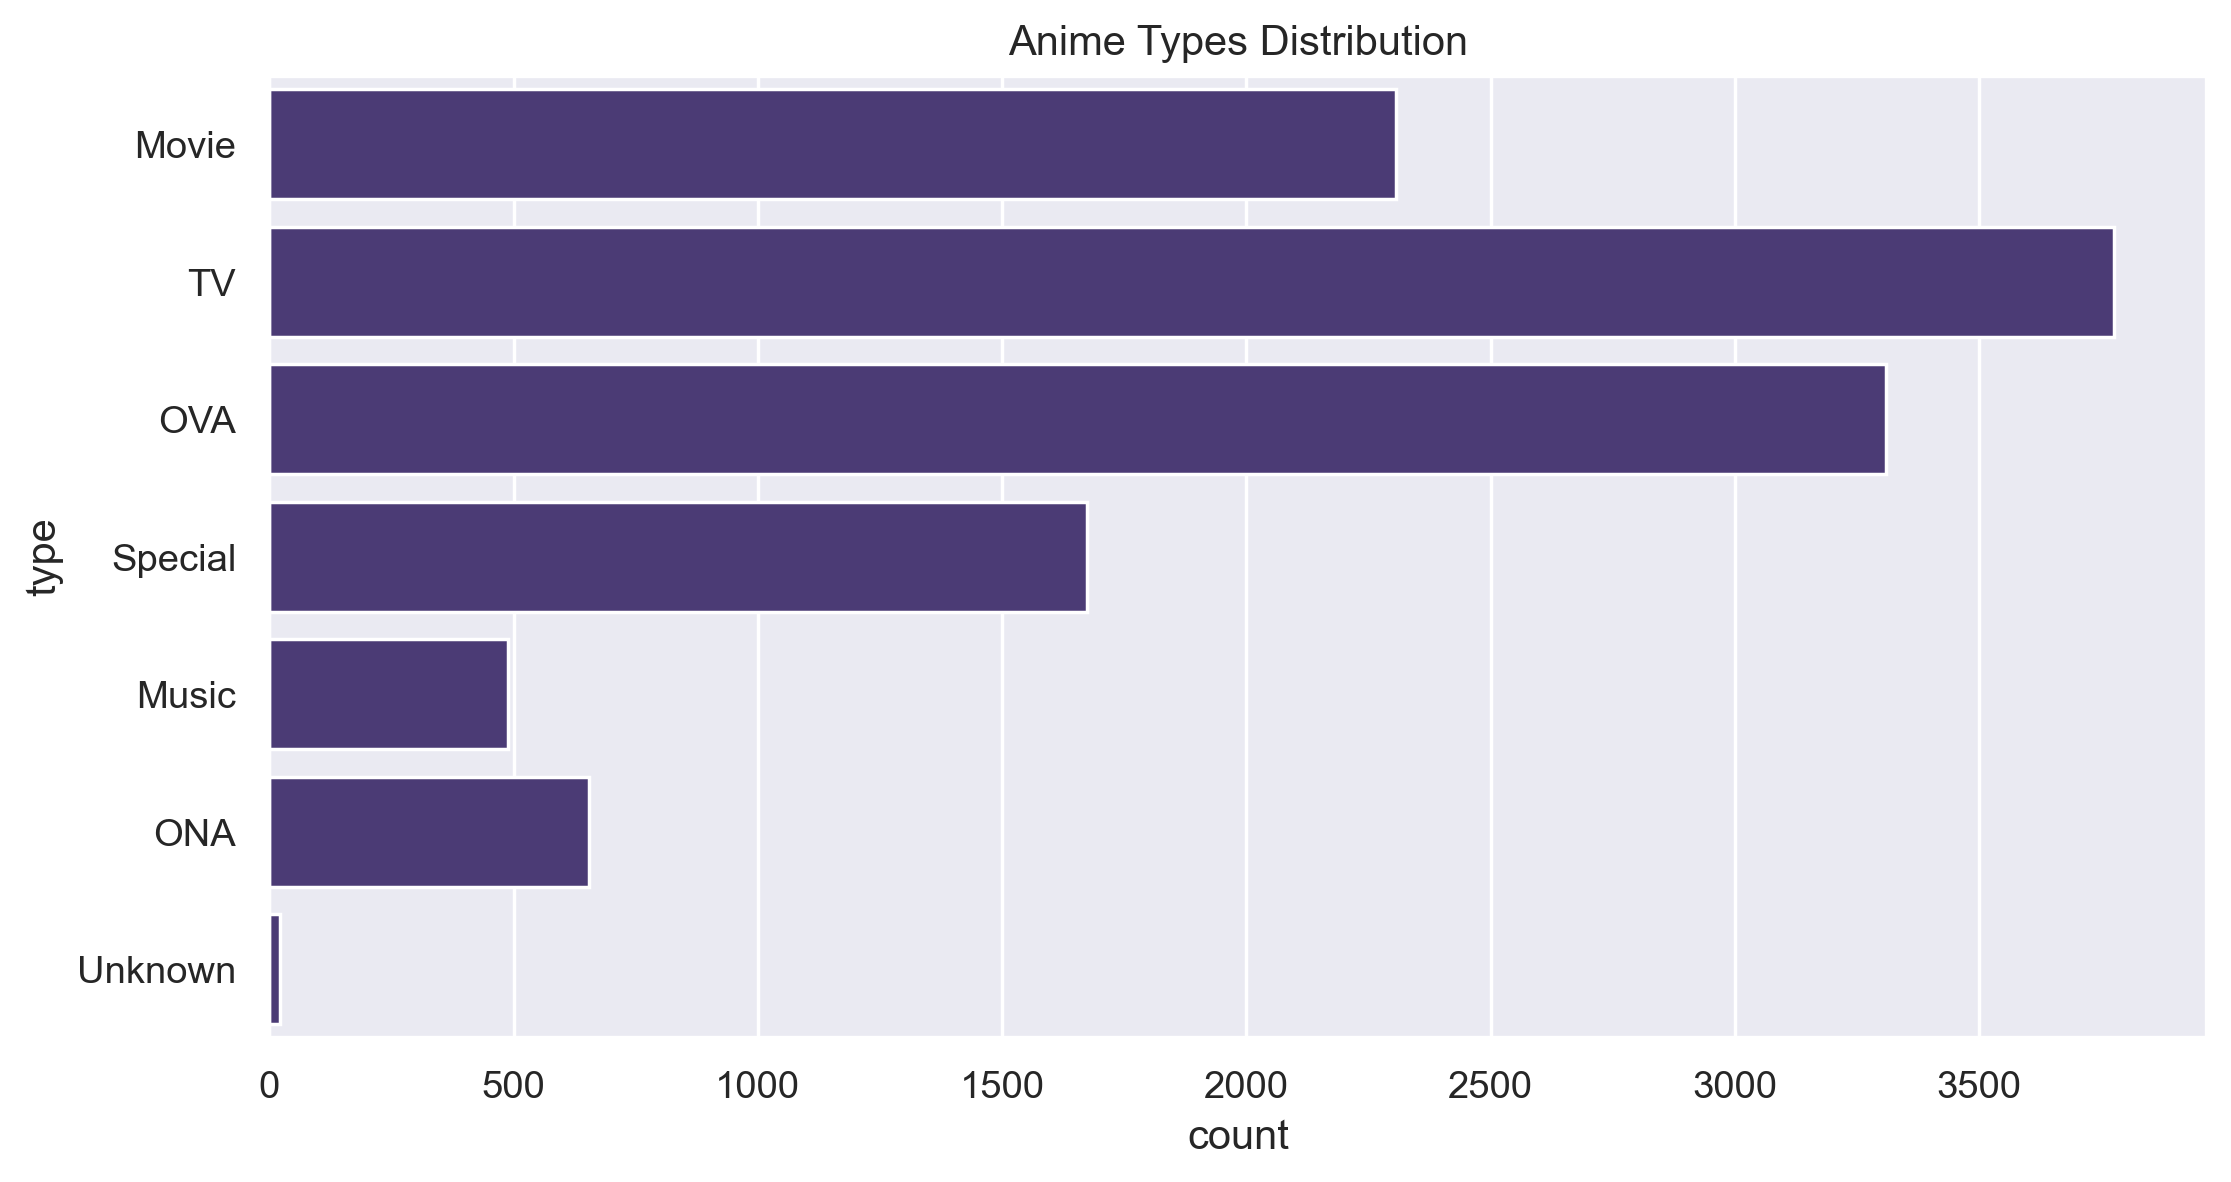

In [140]:
sns.countplot(y='type', data=df)
plt.title("Anime Types Distribution")
plt.show()

In [141]:
df['genre_list'] = df['genre'].str.split(', ')
df['genre_list']

0                   [Drama, Romance, School, Supernatural]
1        [Action, Adventure, Drama, Fantasy, Magic, Mil...
2        [Action, Comedy, Historical, Parody, Samurai, ...
3                                       [Sci-Fi, Thriller]
4        [Action, Comedy, Historical, Parody, Samurai, ...
                               ...                        
12289                                             [Hentai]
12290                                             [Hentai]
12291                                             [Hentai]
12292                                             [Hentai]
12293                                             [Hentai]
Name: genre_list, Length: 12232, dtype: object

In [142]:
from sklearn.preprocessing import MultiLabelBinarizer

In [146]:
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df['genre_list'])

In [148]:
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_, index=df.index)
genre_df

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
type_encoded = pd.get_dummies(df['type'], prefix='type')
type_encoded

,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,type_Unknown
0,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False
2,False,False,False,False,False,True,False
3,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...
12289,False,False,False,True,False,False,False
12290,False,False,False,True,False,False,False
12291,False,False,False,True,False,False,False
12292,False,False,False,True,False,False,False


In [152]:
from sklearn.preprocessing import MinMaxScaler

In [154]:
scaler = MinMaxScaler()
rating_scaled = scaler.fit_transform(df[['rating']])
rating_df = pd.DataFrame(rating_scaled, columns=['rating_scaled'], index=df.index)

In [156]:
features = pd.concat([genre_df, type_encoded, rating_df], axis=1)

In [158]:
features.head()

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Yaoi,Yuri,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,type_Unknown,rating_scaled
0,0,0,0,0,0,0,1,0,0,0,...,0,0,True,False,False,False,False,False,False,0.924370
1,1,1,0,0,0,0,1,0,1,0,...,0,0,False,False,False,False,False,True,False,0.911164
2,1,0,0,1,0,0,0,0,0,0,...,0,0,False,False,False,False,False,True,False,0.909964
3,0,0,0,0,0,0,0,0,0,0,...,0,0,False,False,False,False,False,True,False,0.900360
4,1,0,0,1,0,0,0,0,0,0,...,0,0,False,False,False,False,False,True,False,0.899160


In [160]:
from sklearn.metrics.pairwise import cosine_similarity

In [162]:
cosine_sim = cosine_similarity(features)
cosine_sim

array([[1.        , 0.25622415, 0.11700233, ..., 0.10043727, 0.10334043,
        0.3952007 ],
       [0.25622415, 1.        , 0.43369255, ..., 0.08061272, 0.08294284,
        0.09390813],
       [0.11700233, 0.43369255, 1.        , ..., 0.08051648, 0.08284382,
        0.09379602],
       ...,
       [0.10043727, 0.08061272, 0.08051648, ..., 1.        , 0.99996891,
        0.53974677],
       [0.10334043, 0.08294284, 0.08284382, ..., 0.99996891, 1.        ,
        0.54107319],
       [0.3952007 , 0.09390813, 0.09379602, ..., 0.53974677, 0.54107319,
        1.        ]])

In [101]:
def recommend_anime(name, cosine_sim=cosine_sim, df=df, indices=None, threshold=0.5, top_n=10):
    if indices is None:
        indices = pd.Series(df.index, index=df['name']).drop_duplicates()

    if name not in indices:
        print(f"Anime '{name}' not found in dataset.")
        return []

    idx = indices[name]
    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = [s for s in sim_scores if s[0] != idx and s[1] >= threshold]
    sim_scores = sim_scores[:top_n]
    anime_indices = [i[0] for i in sim_scores]

    recommended = df.loc[anime_indices, ['name']].copy()
    recommended['similarity'] = [i[1] for i in sim_scores]

    return recommended.reset_index(drop=True)

In [103]:
recommendations = recommend_anime("Naruto", threshold=0.4, top_n=5)
print(recommendations)

                     name  similarity
0      Naruto: Shippuuden    0.999983
1  Katekyo Hitman Reborn!    0.920087
2           Dragon Ball Z    0.876384
3  Dragon Ball Kai (2014)    0.875682
4         Dragon Ball Kai    0.875530


In [105]:
from sklearn.model_selection import train_test_split

import numpy as np
df['user_id'] = np.random.randint(0, 100, df.shape[0])  

user_anime = df.groupby('user_id')['name'].apply(list).reset_index()

train_data = {}
test_data = {}

for _, row in user_anime.iterrows():
    user = row['user_id']
    anime_list = row['name']
    if len(anime_list) < 2:
        continue
    train, test = train_test_split(anime_list, test_size=0.3, random_state=42)
    train_data[user] = train
    test_data[user] = test


In [ ]:
#assigning each anime to a user and created a train-test split for each user

In [107]:
def get_recommendations_for_user(train_anime_list):
    recommended_set = set()
    for anime in train_anime_list:
        recs = recommend_anime(anime, threshold=0.4, top_n=5)
        recommended_set.update(recs['name'].values)
    return recommended_set

In [ ]:
# generated pool of recommendations from all liked anime

In [109]:
valid_anime_names = set(df['name'])

user_anime = df.groupby('user_id')['name'].apply(lambda x: [a for a in x if a in valid_anime_names]).reset_index()

In [111]:
def get_recommendations_for_user(train_anime_list, df, indices):
    
    recommended_set = set()
    for anime in train_anime_list:
        recs = recommend_anime(anime, df=df, indices=indices, threshold=0.4, top_n=5)
        if not recs.empty: 
            recommended_set.update(recs['name'].values)
    return recommended_set

cosine_sim = cosine_similarity(features)

indices = pd.Series(df.index, index=df['name']).drop_duplicates()

def recommend_anime(name, cosine_sim=cosine_sim, df=df, indices=indices, threshold=0.5, top_n=10):
    if name not in indices.index:
        print(f"Anime '{name}' not found in dataset.")
        return pd.DataFrame(columns=['name', 'similarity']) 

 
    try:
        idx = indices.loc[name] 
        if isinstance(idx, pd.Series):
             idx = idx.iloc[0]

    except KeyError:
        print(f"Error finding index for anime '{name}'. It might have been filtered out.")
        return pd.DataFrame(columns=['name', 'similarity']) # Return empty DataFrame


    if idx >= cosine_sim.shape[0]:
         print(f"Index {idx} for anime '{name}' is out of bounds for cosine_sim matrix.")
         return pd.DataFrame(columns=['name', 'similarity']) # Return empty DataFrame


    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = [s for s in sim_scores if s[0] != idx and s[1] >= threshold and s[0] in df.index]
    sim_scores = sim_scores[:top_n]
    anime_indices = [i[0] for i in sim_scores]

    recommended = df.loc[anime_indices, ['name']].copy()
    recommended['similarity'] = [i[1] for i in sim_scores]

    return recommended.reset_index(drop=True)

precisions = []
recalls = []
f1s = []

for user in test_data:
    if user not in train_data:
        continue

    recommended = get_recommendations_for_user(train_data[user], df, indices) # Pass df and indices
    actual = set(test_data[user])

    if not recommended or not actual:
        continue

    tp = len(recommended & actual)
   
    precision = tp / len(recommended) if recommended else 0
    recall = tp / len(actual) if actual else 0
    f1 = 2 * precision * recall / (precision + recall) if precision + recall else 0

    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)

print(f"Average Precision: {np.mean(precisions):.4f}")
print(f"Average Recall:    {np.mean(recalls):.4f}")
print(f"Average F1 Score:  {np.mean(f1s):.4f}")

Index 12255 for anime 'Gin no Otoko' is out of bounds for cosine_sim matrix.
Index 12247 for anime 'Joshidai: Ecchi Soudanshitsu' is out of bounds for cosine_sim matrix.
Index 12293 for anime 'Yasuji no Pornorama: Yacchimae!!' is out of bounds for cosine_sim matrix.
Index 12286 for anime 'Teleclub no Himitsu' is out of bounds for cosine_sim matrix.
Index 12251 for anime 'Chou Do M na Hentai Mesu-tachi Otokoton Choukyou Itashimasu!' is out of bounds for cosine_sim matrix.
Index 12282 for anime 'Shikkoku no Shaga The Animation' is out of bounds for cosine_sim matrix.
Index 12240 for anime 'Dream Hazard: Akuma no Program' is out of bounds for cosine_sim matrix.
Index 12243 for anime 'Mini Skirt Gakuen' is out of bounds for cosine_sim matrix.
Index 12241 for anime 'Esper Bishoujo Manami' is out of bounds for cosine_sim matrix.
Index 12266 for anime 'Kyuukyoku no Chef wa Oishinbo Papa' is out of bounds for cosine_sim matrix.
Index 12250 for anime 'Bishoujo Animerama: Minami no Watashi no He


#True Positives
#Precision = TP / (TP + FP)
#Recall = TP / (TP + FN)
#F1 Score



#The system isn't performing well because it has limited data
Some anime can't be found because of changes made during data cleaning.
To improve, we need better feature alignment, fix the data issues, add more useful details about each anime.


# Interview Questions

#1. Can you explain the difference between user-based and item-based collaborative filtering?


#User-based collaborative filtering recommends items by finding users with similar preferences and suggesting what they liked.
Item-based collaborative filtering recommends items similar to what the user has already liked or interacted with.


#2. What is collaborative filtering, and how does it work?


#Collaborative filtering is a recommendation method that predicts a user's interests based on preferences of similar users or items.
It works by finding patterns in user behavior—like ratings or views—without needing item content.
